# Introduction to Python  

## Pandas - Exploratory Data Analysis (EDA) part 1

In [1]:
import os
import zipfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

## Pandas Basic EDA 

## Pandas Group By and Pandas Transform

In [2]:
datapath = '../Data/EDA/'
transform = 'sales_transactions.xlsx'
zipname = 'vehicles'

In [69]:
df_tf = pd.read_excel(os.path.join(datapath, transform))
df_tf.head(20)

,account,name,order,sku,quantity,unit price,ext price
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360"
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040"
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120"
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650


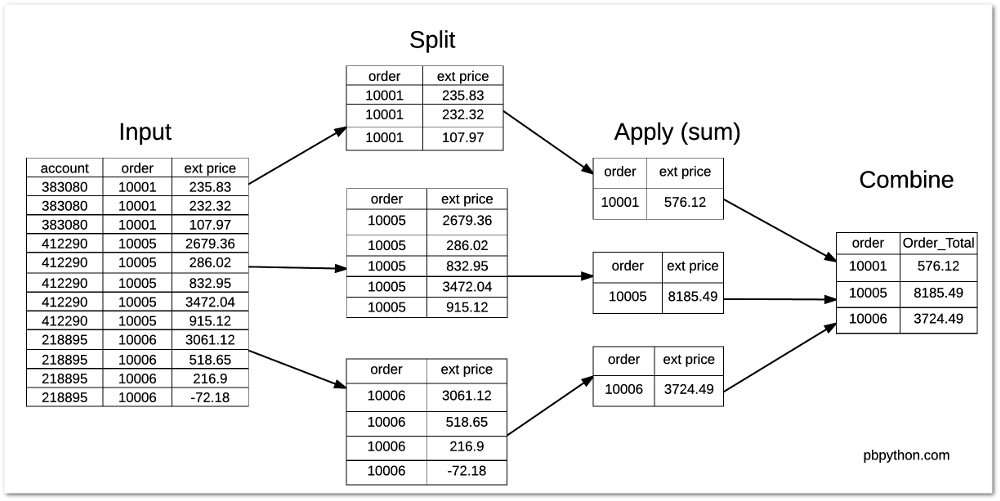

In [43]:
display(Image(os.path.join(datapath,'groupby-example.png'), width=700))

In [71]:
gb = df_tf.groupby('order')
print(type(gb))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [73]:
#dir(gb)

len(gb)

3

In [81]:
for g in gb:
    print(g[0])
    print(g[1].head())
    print(type(g[1]))

10001
   account      name  order       sku  quantity  unit price  ext price
0   383080  Will LLC  10001  B1-20000         7      33.690    235.830
1   383080  Will LLC  10001  S1-27722        11      21.120    232.320
2   383080  Will LLC  10001  B1-86481         3      35.990    107.970
<class 'pandas.core.frame.DataFrame'>
10005
   account           name  order       sku  quantity  unit price  ext price
3   412290  Jerde-Hilpert  10005  S1-06532        48      55.820  2,679.360
4   412290  Jerde-Hilpert  10005  S1-82801        21      13.620    286.020
5   412290  Jerde-Hilpert  10005  S1-06532         9      92.550    832.950
6   412290  Jerde-Hilpert  10005  S1-47412        44      78.910  3,472.040
7   412290  Jerde-Hilpert  10005  S1-27722        36      25.420    915.120
<class 'pandas.core.frame.DataFrame'>
10006
    account       name  order       sku  quantity  unit price  ext price
8    218895  Kulas Inc  10006  S1-27722        32      95.660  3,061.120
9    218895  Kulas I

In [83]:
df_tf.groupby('order')["ext price"].sum()

order
10001     576.120
10005   8,185.490
10006   3,724.490
Name: ext price, dtype: float64

In [88]:
order_total = df_tf.groupby('order')["ext price"].sum().rename("Order_Total").reset_index()
order_total

,order,Order_Total
0,10001,576.120
1,10005,"8,185.490"
2,10006,"3,724.490"


In [85]:
df_tf1 = df_tf.merge(order_total)
df_tf1

,account,name,order,sku,quantity,unit price,ext price,Order_Total
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830,576.120
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320,576.120
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970,576.120
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360","8,185.490"
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020,"8,185.490"
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950,"8,185.490"
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040","8,185.490"
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120,"8,185.490"
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120","3,724.490"
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650,"3,724.490"


In [86]:
df_tf1["Percent_of_Order"] = df_tf1["ext price"] / df_tf1["Order_Total"]
df_tf1

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830,576.120,0.409
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320,576.120,0.403
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970,576.120,0.187
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360","8,185.490",0.327
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020,"8,185.490",0.035
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950,"8,185.490",0.102
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040","8,185.490",0.424
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120,"8,185.490",0.112
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120","3,724.490",0.822
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650,"3,724.490",0.139


In [45]:
df_tf.groupby('order')["ext price"].transform('sum')

0      576.120
1      576.120
2      576.120
3    8,185.490
4    8,185.490
5    8,185.490
6    8,185.490
7    8,185.490
8    3,724.490
9    3,724.490
10   3,724.490
11   3,724.490
Name: ext price, dtype: float64

In [46]:
df_tf["Order_Total"] = df_tf.groupby('order')["ext price"].transform('sum')
df_tf["Percent_of_Order"] = df_tf["ext price"] / df_tf["Order_Total"]
df_tf

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830,576.120,0.409
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320,576.120,0.403
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970,576.120,0.187
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360","8,185.490",0.327
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020,"8,185.490",0.035
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950,"8,185.490",0.102
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040","8,185.490",0.424
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120,"8,185.490",0.112
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120","3,724.490",0.822
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650,"3,724.490",0.139


In [47]:
df_tf["Percent_of_Order"] = df_tf["ext price"] / df_tf.groupby('order')["ext price"].transform('sum')
df_tf

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830,576.120,0.409
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320,576.120,0.403
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970,576.120,0.187
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360","8,185.490",0.327
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020,"8,185.490",0.035
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950,"8,185.490",0.102
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040","8,185.490",0.424
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120,"8,185.490",0.112
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120","3,724.490",0.822
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650,"3,724.490",0.139


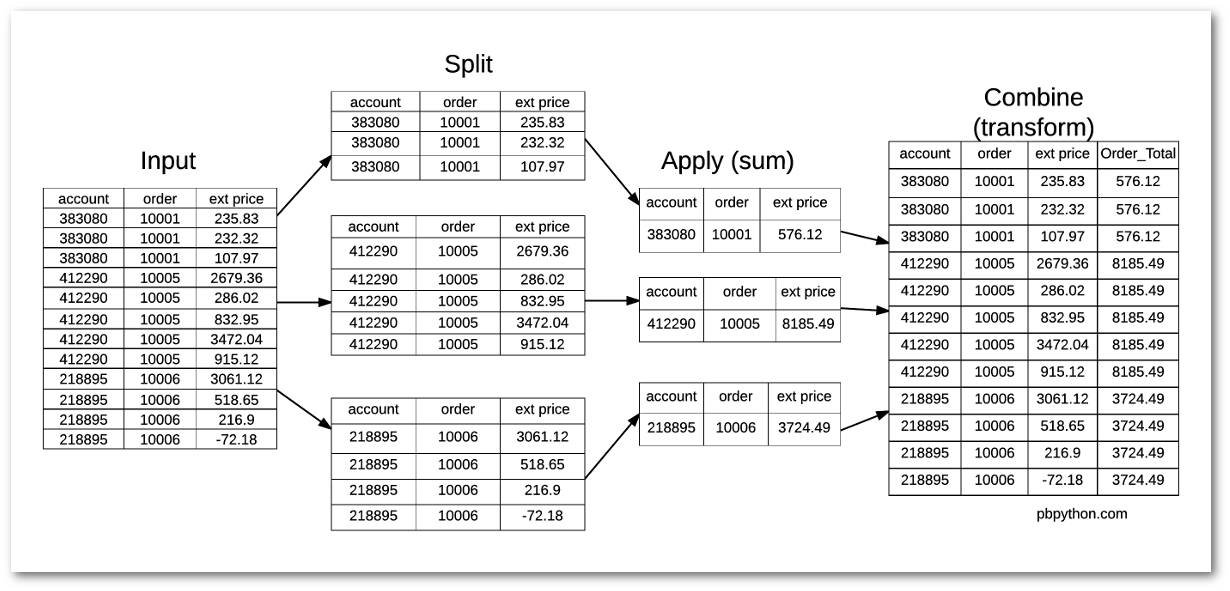

In [48]:
display(Image(os.path.join(datapath,'transform-example.png'), width=700))